In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image
from PIL import Image

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
single_image= X_train[20000]

In [7]:
single_image.shape

(28, 28)

Text(0.5, 1.0, 'BALAMURUGAN')

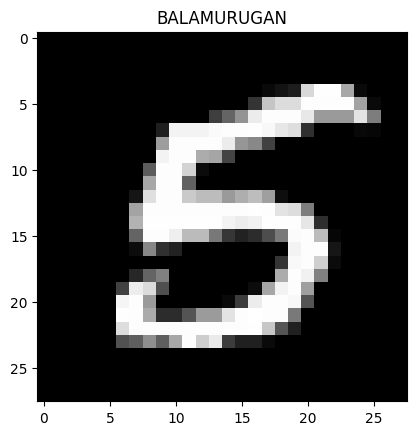

In [8]:
plt.imshow(single_image,cmap='gray')
plt.title('BALAMURUGAN')

In [9]:
y_train.shape

(60000,)

In [10]:
X_train.min()

0

In [11]:
X_train.max()

255

In [12]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [13]:
X_train_scaled.min()

0.0

In [14]:
X_train_scaled.max()

1.0

In [15]:
y_train[0]

5

In [16]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [17]:
type(y_train_onehot)

numpy.ndarray

In [18]:
y_train_onehot.shape

(60000, 10)

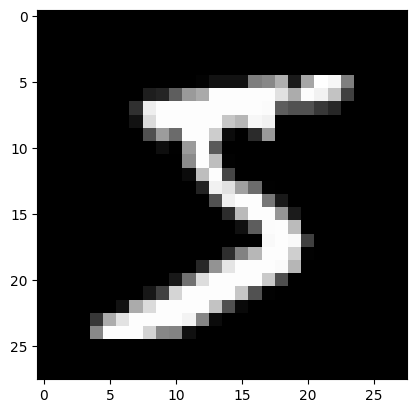

In [19]:
single_image = X_train[0]
plt.imshow(single_image,cmap='gray')

In [20]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [22]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 20)                92180     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 93222 (364.15 KB)
Trainable params: 93222 (364.15 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [25]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=70, validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
858/858 [==============================] - 30s 34ms/step - loss: 0.2706 - accuracy: 0.9200 - val_loss: 0.0973 - val_accuracy: 0.9727
Epoch 2/5
858/858 [==============================] - 27s 31ms/step - loss: 0.0807 - accuracy: 0.9769 - val_loss: 0.0656 - val_accuracy: 0.9808
Epoch 3/5
858/858 [==============================] - 27s 31ms/step - loss: 0.0583 - accuracy: 0.9829 - val_loss: 0.0600 - val_accuracy: 0.9810
Epoch 4/5
858/858 [==============================] - 34s 39ms/step - loss: 0.0462 - accuracy: 0.9857 - val_loss: 0.0463 - val_accuracy: 0.9837
Epoch 5/5
858/858 [==============================] - 27s 31ms/step - loss: 0.0394 - accuracy: 0.9877 - val_loss: 0.0472 - val_accuracy: 0.9836


In [26]:
metrics = pd.DataFrame(model.history.history)

In [27]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.270621,0.920033,0.097321,0.9727
1,0.080673,0.976867,0.065578,0.9808
2,0.058347,0.982883,0.059968,0.9810
3,0.046227,0.985717,0.046305,0.9837
4,0.039443,0.987667,0.047170,0.9836


Text(0.5, 1.0, 'BALAMURUGAN B\n212222230016')

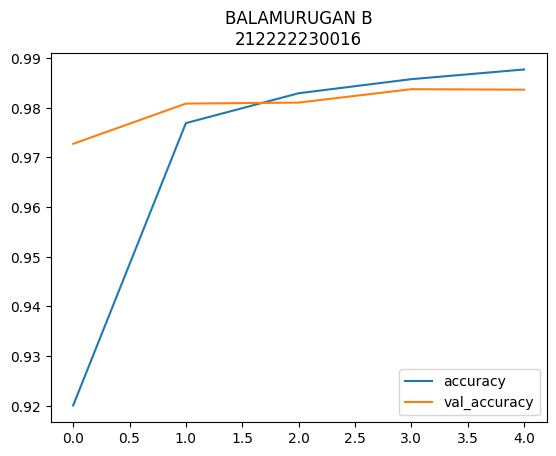

In [28]:

metrics[['accuracy','val_accuracy']].plot()
plt.title('BALAMURUGAN B\n212222230016')

Text(0.5, 1.0, 'BALAMURUGAN B\n212222230016')

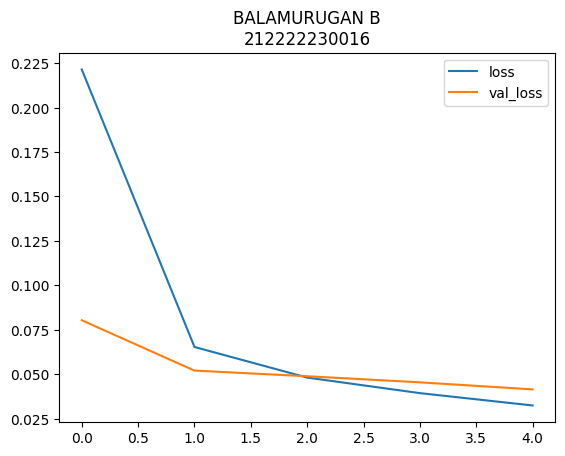

In [49]:
metrics[['loss','val_loss']].plot()
plt.title('BALAMURUGAN B\n212222230016')

In [32]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 1s 4ms/step


In [50]:
print("BALAMURUGAN B\n212222230016")
print(confusion_matrix(y_test,x_test_predictions))

BALAMURUGAN B
212222230016
[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1129    1    2    0    1    2    0    0    0]
 [   1    4 1016    2    0    0    0    4    4    1]
 [   0    0    3 1004    0    0    0    1    2    0]
 [   1    0    0    0  969    0    2    0    1    9]
 [   2    0    0    9    0  875    1    0    1    4]
 [   7    3    0    0    1    1  945    0    1    0]
 [   1    2    5    2    0    0    0 1009    2    7]
 [   5    0    3    1    1    0    1    3  953    7]
 [   1    1    0    1    2    3    0    2    1  998]]


In [51]:
print("BALAMURUGAN B\n212222230016")
print(classification_report(y_test,x_test_predictions))

BALAMURUGAN B
212222230016
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [36]:
img = image.load_img('/content/Seven.png')

In [37]:
type(img)

PIL.Image.Image

In [38]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [39]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 28ms/step


In [40]:
print(x_single_prediction)

[8]


BALAMURUGAN B
212222230016


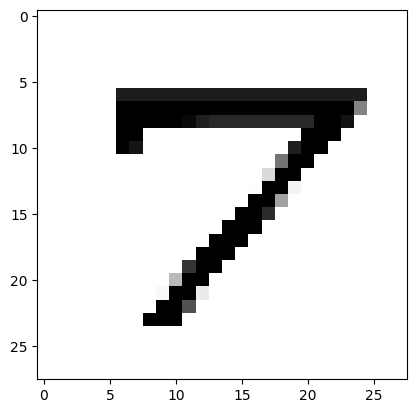

In [52]:
print("BALAMURUGAN B\n212222230016")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [42]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [43]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)



1/1 [==============================] - 0s 23ms/step


In [44]:
print(x_single_prediction)

[7]
